# 1. Programming a Chess Player

In [1]:
pip install python-chess

Note: you may need to restart the kernel to use updated packages.


CS371: Introduction to Cognitive Science  
Bryn Mawr College  
Department of Computer Science  
Professor Blank, Fall 2016

**Goals**:

* explore the idea that a computer could "think"
* explore symbolic computation
* write a program to play Chess

In this notebook we will begin to explore *symbolic computation* by writing a program to play Chess. Perhaps you don't know how to play Chess... no problem! You don't really need to know much, but a primer on Chess may be useful. Here are some links that might be useful:

**Getting Started with Chess**:

* http://www.chesscorner.com/tutorial/learn.htm
* https://www.chesscademy.com/
* http://learningchess.net/us/index
* https://www.chess.com/learn-how-to-play-chess

For these experiments, we will use the `python-chess` library. In this notebook, we will define three different sample players. We explore them in some depth here to attempt to understand how each plays chess.

**python-chess Reference**:

* https://python-chess.readthedocs.io/en/v0.15.0/core.html

## 1.1 Game Play

The first thing we need to do is import the chess library:

In [2]:
import chess

We will use the chess library in the following manner:

1. Create a chess.Board instance
1. The chess.Board instance automatically generates all possible moves for the current player
1. Current player picks a move
1. Go to step #2 and repeat until win, lose, or draw

That's it! Thus we have reduced the playing a valid game of chess into simply selecting a move at each turn. To play a good game of chess, you will want to pick "the best move" at each turn. 

A player will be a function that takes a board instance as a argument, and returns a move encoded as a string in Universal Chess Interface format:

```python
def player(board):
    ### "Thinking" happens here
    return move_code
```

We'll explain this fully below.

## 1.2 The Board class

The Board class keeps track of whose turn it is, possible moves, and a history of all past moves. This class can undo and redo moves, and keeps track of repeating states. 

First, we create a board instance:

In [3]:
board = chess.Board()

The `board.turn` value is a boolean indicating whose turn it is. The values are either True for white or False for black.

In [4]:
board.turn

True

As seen above, the game always begins with white's turn. If you forget which is True, you can ask the chess module:

In [5]:
board.turn == chess.WHITE

True

The chess.Board class is responsible for generating all possible moves, whose turn it is, keeping track of the placement of all pieces, and making each move. The chess.Board represents a two-dimensional 8 x 8 array. However, the internal representation is optimized for speedy operations.

Here is a visual representation of a chess.Board:

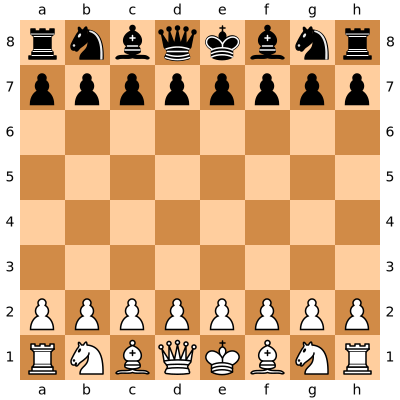

In [6]:
board

You can also get an ASCII board representation (text-only) by converting the board into a string:

In [7]:
print(str(board))

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


In [8]:
board.fen()

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'

The string representation of the board shows the character representation for each piece. Specifically:

Piece | White |  Black
------|-------|--------
Pawn   | P | p
Rook   | R | r
Knight | N | n
Bishop | B | b
Queen  | Q | q
King   | K | k
 

For our uses, you don't really need to know how each piece moves. We discuss game strategy, though, shortly.

The 2-dimensional board is laid out so that each position is indicated by a column letter and row number. However, the internal representation is sequential. Say that we wanted to see what was at location 'c1' we could use:

In [9]:
chess.C1

2

to get the internal location of the column/row, and then use:

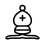

In [10]:
board.piece_at(chess.C1)

Or shown as a character:

In [11]:
str(board.piece_at(chess.C1))

'B'

Indeed, there is a white bishop at 'c1'.

## 1.3 Making Moves

At this point, we can as the board instance to generate all of the possible, legal moves:

In [12]:
list(board.legal_moves)

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

**Python Note**: `board.legal_moves` looks like a normal list of items. But it is really a property that gets lazily generated on the fly. We force it to be a list by wrapping `list()` around it.

We can get the first move (index zero):

In [13]:
move = list(board.legal_moves)[0]

### 1.3.1 Universal Chess Interface

The Universal Chess Interface (or uci) is a representation for describing a move from one cell to another (and perhaps additional information as well). We explore the first move:

In [14]:
move

Move.from_uci('g1h3')

In [15]:
move.uci()

'g1h3'

Thus, this is a move from b1 to a3. 

What piece is this, and where is it moving on the board? Is this a good move?

The uci string is what each player function will return.

### 1.3.2 Standard Algebraic Notation

If you know something about Chess, you might know about Standard Algebraic Notation (or san). This is an alternative to uci. You can get a move's san with:

In [16]:
board.san(move)

'Nh3'

However, we will always use uci.

## 1.4 Programming a Random Player

There is a useful function in the random module that will select from a a list of choices. This is called `random.choice`.

In [17]:
import random

To use it in a function, we simply:

In [18]:
def random_player(board):
    move = random.choice(list(board.legal_moves))
    return move.uci()

In [19]:
random_player(board)

'a2a3'

In [20]:
for i in range(10):
    print(random_player(board))

b1a3
c2c3
f2f4
e2e4
b1a3
d2d3
c2c3
b2b3
d2d3
b2b3


## 1.5 Playing a Game

In [21]:
import time
from IPython.display import display, HTML, clear_output

A useful function for displaying the color of a player:

In [22]:
def who(player):
    return "White" if player == chess.WHITE else "Black"

A function for displaying the board as text, or as the nice image (called SVG):

In [23]:
def display_board(board, use_svg):
    if use_svg:
        return board._repr_svg_()
    else:
        return "<pre>" + str(board) + "</pre>"
    

And finally, we can put those together to play a game:

In [24]:
def play_game(player1, player2, visual="svg", pause=0.1):
    """
    playerN1, player2: functions that takes board, return uci move
    visual: "simple" | "svg" | None
    """
    use_svg = (visual == "svg")
    board = chess.Board()  
    try:
        while not board.is_game_over(claim_draw=True):
            if board.turn == chess.WHITE:
                uci = player1(board)
            else:
                uci = player2(board)
            name = who(board.turn)
            board.push_uci(uci)
            board_stop = display_board(board, use_svg)
            html = "<b>Move %s %s, Play '%s':</b><br/>%s" % (
                       len(board.move_stack), name, uci, board_stop)
            if visual is not None:
                if visual == "svg":
                    clear_output(wait=True)
                display(HTML(html))
                if visual == "svg":
                    time.sleep(pause)
    except KeyboardInterrupt:
        msg = "Game interrupted!"
        return (None, msg, board)
    result = None
    if board.is_checkmate():
        msg = "checkmate: " + who(not board.turn) + " wins!"
        result = not board.turn
    elif board.is_stalemate():
        msg = "draw: stalemate"
    elif board.is_fivefold_repetition():
        msg = "draw: 5-fold repetition"
    elif board.is_insufficient_material():
        msg = "draw: insufficient material"
    elif board.can_claim_draw():
        msg = "draw: claim"
    if visual is not None:
        print(msg)
    return (result, msg, board)

The function takes to player functions (first white, then black), and an optional argument to indicate representation style.

Let's pit random_player vs. random_player:

Many times, that will end in a draw.

In [25]:
play_game(random_player, random_player)

draw: insufficient material


(None, 'draw: insufficient material', Board('8/7k/8/4K3/8/8/8/8 b - - 0 110'))

## 1.6 Allowing a Human Player

Do you want to play a game? Here is a way to play:

In [26]:
def human_player(board):
    display(board)
    uci = get_move("%s's move [q to quit]> " % who(board.turn))
    legal_uci_moves = [move.uci() for move in board.legal_moves]
    while uci not in legal_uci_moves:
        print("Legal moves: " + (",".join(sorted(legal_uci_moves))))
        uci = get_move("%s's move[q to quit]> " % who(board.turn))
    return uci

And a helper function to handle the input:

In [27]:
def get_move(prompt):
    uci = input(prompt)
    if uci and uci[0] == "q":
        raise KeyboardInterrupt()
    try:
        chess.Move.from_uci(uci)
    except:
        uci = None
    return uci

Note that you must enter your move in UCI, such as "a2a4", meaning moving the piece at a2 to location a4.

Try you hand at playing chess against the random_player. It is not as easy as it sounds. Did you win? How many turns did it take?

## 1.7 Analysis

If a random_player plays a random_player many times, how many times would you expect white to win? Black to win? To end in a draw?

Let's try it:

In [28]:
counts = {None: 0, True: 0, False: 0}
for i in range(10):
    result, msg, board = play_game(random_player, random_player, visual=None)
    counts[result] += 1
    print(counts)
counts

{None: 0, True: 1, False: 0}
{None: 1, True: 1, False: 0}
{None: 2, True: 1, False: 0}
{None: 2, True: 1, False: 1}
{None: 3, True: 1, False: 1}
{None: 4, True: 1, False: 1}
{None: 4, True: 1, False: 2}
{None: 4, True: 1, False: 3}
{None: 5, True: 1, False: 3}
{None: 6, True: 1, False: 3}


{None: 6, True: 1, False: 3}

## 1.8 Static Analysis/Board Evaluation

The next sample player takes each possible move, applies it to a temporary board and state, and then goes through the board, place by place, in order to compute an evaluation score for each resulting state. The moves are sorted by this score, and the best move is then returned:

In [29]:
def player1(board):
    moves = list(board.legal_moves)
    for move in moves:
        newboard = board.copy()
        # go through board and return a score
        move.score = staticAnalysis(newboard, move, board.turn)
    moves.sort(key=lambda move: move.score, reverse=True) # sort on score
    return moves[0].uci()

The actual score is computed by the staticAnalysis function which is designed to evaluate the resulting board after each hypothesized move. To come up with a score for each static snapshot of a board, it will be necessary to know how many of each piece is left, and where they are. You can use the `board.pieces()` method for this:

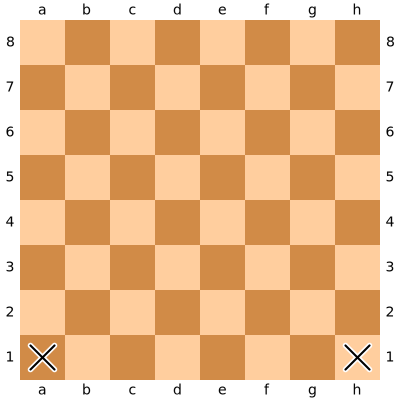

In [30]:
board = chess.Board()

board.pieces(chess.ROOK, True)

If you look at the output as a list, you'll see the 1-D representation of where those pieces are on the game board:

In [31]:
list(board.pieces(chess.ROOK, True))

[0, 7]

In [32]:
len(board.pieces(chess.ROOK, True))

2

There are 2 white rooks.

Now, putting that into a function, checking for each type of piece:

In [33]:
def staticAnalysis(board, move, my_color):
    score = 0
    ## Check some things about this move:
    # score += 10 if board.is_capture(move) else 0
    # To actually make the move:
    board.push(move)
    # Now check some other things:
    for (piece, value) in [(chess.PAWN, 1), 
                           (chess.BISHOP, 4), 
                           (chess.KING, 0), 
                           (chess.QUEEN, 10), 
                           (chess.KNIGHT, 5),
                           (chess.ROOK, 3)]:
        score += len(board.pieces(piece, my_color)) * value
        score -= len(board.pieces(piece, not my_color)) * value
        # can also check things about the pieces position here
    return score

In [34]:
play_game(player1, random_player)

draw: claim


(None,
 'draw: claim',
 Board('r5n1/pp1bqp2/2n5/8/2p1k3/8/PPPPPPPP/RNBQKB1R b Q - 25 24'))

**NOTE**: The string representation for the board is in [Forsyth-Edwards Notation](https://en.wikipedia.org/wiki/Forsyth%E2%80%93Edwards_Notation), or FEN for short. The last number (6th column) is the "full-move count". If the full-move count is 36, then there have been 35 * 2 full-moves, plus 1 if "b" is in second columns, for 71 moves.

That didn't play so well! Why not?

The following is one way around the problem. What does it do differently?

In [35]:
def staticAnalysis(board, move, my_color):
    score = random.random()
    ## Check some things about this move:
    # score += 10 if board.is_capture(move) else 0
    # To actually make the move:
    board.push(move)
    # Now check some other things:
    for (piece, value) in [(chess.PAWN, 1), 
                           (chess.BISHOP, 4), 
                           (chess.KING, 0), 
                           (chess.QUEEN, 10), 
                           (chess.KNIGHT, 5),
                           (chess.ROOK, 3)]:
        score += len(board.pieces(piece, my_color)) * value
        score -= len(board.pieces(piece, not my_color)) * value
        # can also check things about the pieces position here
    return score

In [36]:
play_game(player1, random_player)

draw: stalemate


(None,
 'draw: stalemate',
 Board('8/1Q5p/P3Pk1P/2K2P2/7P/N4R2/8/2N1R3 b - - 4 72'))

Better! But it still is not very aggressive. What could we add to make it attack?

In [37]:
def staticAnalysis(board, move, my_color):
    score = random.random()
    ## Check some things about this move:
    # score += 10 if board.is_capture(move) else 0
    # To actually make the move:
    board.push(move)
    # Now check some other things:
    for (piece, value) in [(chess.PAWN, 1), 
                           (chess.BISHOP, 4), 
                           (chess.KING, 0), 
                           (chess.QUEEN, 10), 
                           (chess.KNIGHT, 5),
                           (chess.ROOK, 3)]:
        score += len(board.pieces(piece, my_color)) * value
        score -= len(board.pieces(piece, not my_color)) * value
        # can also check things about the pieces position here
    # Check global things about the board
    score += 100 if board.is_checkmate() else 0
    return score

In [38]:
play_game(player1, random_player)

checkmate: White wins!


(True,
 'checkmate: White wins!',
 Board('4k3/4Q3/5P2/P7/1PPP4/4BN2/2R4P/1NK4R b - - 2 49'))

Not bad!

This staticAnalysis function makes a much better player than either of the random players, but it still has major issues. How can you improve this static evaluation function?

## 1.9 Suggestions

Pawns get promoted when they get to the back row. Encourage them to get to the back row (eg, the closer they are to the opposite side, the better).

* It is good to threaten opponent pieces.
* It is good that your opponent's King has no valid moves.

Static analysis on the next move's state can only do so much good. It would be better if you could "look ahead" further and see the results of what your opponent could do, given what your proposed move did. And then see what you could do, then what they would do, etc. This is how real chess programs work. There are many algorithms for finding the best move by looking many moves ahead, such as minimax and alpha-beta pruning. You'll explore these ideas fully in Artificial Intelligence.

Your board evaluation function could change during the game. For example, you might use one evaluation function at the beginning, one in the middle, and another at the end. How can you tell where you are in a game?

There is a nice article on Chess Strategy at wikipedia: http://en.wikipedia.org/wiki/Chess_strategy